In [1]:
using DataStructures, Serialization, DelimitedFiles, DataFrames, StatsPlots

In [2]:
include("quickret_phase1_1.jl");
# include("quickret_phase2_1.jl");

In [3]:
_1 = deserialize("full_score_data_1_100");
_2 = deserialize("full_score_data_101_200");
_3 = deserialize("full_score_data_201_300");
_4 = deserialize("full_score_data_301_400");
_5 = deserialize("full_score_data_401_500");
quickret_obj, totalfeaturecount = deserialize("quickret_object_and_totalfeaturecount");
template_list = readdir("./interfaces/");
# quickret_obj, totalfeaturecount = deserialize("quickret_object_and_totalfeaturecount_1000_interface")

In [4]:
total_results = merge(_1,_2,_3,_4,_5);

In [13]:
total_score_dict = OrderedDict();
@time for (key,value) in total_results
    temp_score_dict = OrderedDict()
    for (hash_int, (matchlist_length, longest_transformation_length)) in value
        temp_score_dict[hash_int] = (matchlist_length/totalfeaturecount[hash_int])+((longest_transformation_length)^2/matchlist_length);
    end
    total_score_dict[key] = temp_score_dict;
end

 66.135957 seconds (726.21 M allocations: 15.229 GiB, 32.74% gc time)


In [14]:
# Clusters from PIFACE.
piface_data = readdlm("./finalInterfaceClusters_2013_January_24_.txt", '\t');
clusters = [];
for i in 1:size(piface_data, 1)
    temp_clusters = piface_data[i,8:end];
    temp_clusters = temp_clusters[temp_clusters.!=""];
    push!(clusters, temp_clusters);
end
result_df = DataFrame(piface_data[:,[2,4,6]]);
result_df."x4" = clusters;

In [15]:
sorted_total_score_dict = OrderedDict();
for (query_key, query_value) in total_score_dict
    sorted_total_score_dict[query_key] = sort(OrderedDict(value => key for (key,value) in query_value), rev=true)
end    

In [16]:
function get_results(sorted_total_score_dict, first_n, template_list, result_df)
    query_finals = OrderedDict()
    for ((protein,chain),scores) in sorted_total_score_dict
    final_score = 0
    for (score,representative) in Iterators.take(scores,first_n)
        result = uppercase(template_list[representative][1:6])
        result_cluster = result_df[result_df.x3 .== result,4]
        if length(result_cluster) != 0
            filtered_cluster = result_cluster[1][occursin.(protein,result_cluster[1])]
            if length(filtered_cluster) != 0
                final_score += sum(x-> (x[5]==chain) | (x[6] ==chain), filtered_cluster)
            end
        end
    end
    query_finals[protein,chain] = final_score
#     println(protein,chain, " => ",final_score)
    flush(stdout)
    end
    return query_finals
end

get_results (generic function with 1 method)

In [9]:
@time top_one_result = get_results(sorted_total_score_dict, 1, template_list, result_df);

  5.197619 seconds (56.46 M allocations: 2.268 GiB, 32.53% gc time)


In [10]:
@time top_ten_result = get_results(sorted_total_score_dict, 10, template_list, result_df);

 44.925065 seconds (552.25 M allocations: 22.070 GiB, 36.86% gc time)


In [11]:
@time top_fifty_result = get_results(sorted_total_score_dict, 50, template_list, result_df);

226.476205 seconds (2.76 G allocations: 110.341 GiB, 37.16% gc time)


In [12]:
@time top_hundred_result = get_results(sorted_total_score_dict, 100, template_list, result_df);

454.033909 seconds (5.52 G allocations: 220.678 GiB, 37.18% gc time)


In [17]:
@time top_one_result_2 = get_results(sorted_total_score_dict, 1, template_list, result_df);

  4.988675 seconds (55.32 M allocations: 2.212 GiB, 37.97% gc time)


In [18]:
@time top_ten_result_2 = get_results(sorted_total_score_dict, 10, template_list, result_df);

 47.592119 seconds (552.23 M allocations: 22.069 GiB, 38.54% gc time)


In [19]:
@time top_fifty_result_2 = get_results(sorted_total_score_dict, 50, template_list, result_df);

237.949408 seconds (2.76 G allocations: 110.337 GiB, 38.50% gc time)


In [20]:
@time top_hundred_result_2 = get_results(sorted_total_score_dict, 100, template_list, result_df);

475.849273 seconds (5.52 G allocations: 220.674 GiB, 38.52% gc time)


In [86]:
# for (score,template) in sorted_total_score_dict[("2GE7", 'A')]
#     result = uppercase(template_list[template][1:6])
#     result_cluster = result_df[result_df.x3 .== result,4]
#     println(result_cluster)
    
# end

In [40]:
top_one_acc = sum(x->x != 0, collect(values(top_one_result)))

92

In [41]:
top_one_acc_2 = sum(x->x != 0, collect(values(top_one_result_2)))

279

In [42]:
top_ten_acc = sum(x->x != 0, collect(values(top_ten_result)))

170

In [43]:
top_ten_acc_2 = sum(x->x != 0, collect(values(top_ten_result_2)))

292

In [44]:
top_fifty_acc = sum(x->x != 0, collect(values(top_fifty_result)))

201

In [45]:
top_fifty_acc_2 = sum(x->x != 0, collect(values(top_fifty_result_2)))

297

In [46]:
top_hundred_acc = sum(x->x != 0, collect(values(top_hundred_result)))

223

In [47]:
top_hundred_acc_2 = sum(x->x != 0, collect(values(top_hundred_result_2)))

302

In [86]:
first_score = [92, 170, 201, 223]./820

4-element Array{Float64,1}:
 0.11219512195121951
 0.2073170731707317
 0.2451219512195122
 0.27195121951219514

In [87]:
second_score = [279, 292, 297, 302]./820

4-element Array{Float64,1}:
 0.3402439024390244
 0.35609756097560974
 0.3621951219512195
 0.36829268292682926

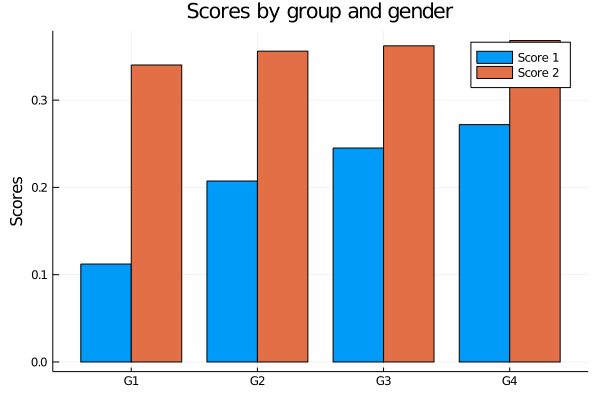

In [200]:
mn = [0.11219512195121951,  0.2073170731707317,  0.2451219512195122, 0.27195121951219514, 0.3402439024390244, 0.35609756097560974, 0.3621951219512195, 0.36829268292682926]
sx = repeat(["Score 1", "Score 2"], inner = 4)
# std = [2, 3, 4, 1, 2, 3, 5, 2, 3, 3]
nam = repeat("G" .* string.(1:4), outer = 2)

using StatsPlots
groupedbar(nam, mn, group = sx, ylabel = "Scores", 
        title = "Scores by group and gender")

In [209]:
sx = repeat(["Score 1", "Score 2"], inner=4);
nam = repeat(["Top 1 - 1", "Top 10 - 2", "Top 50 - 3", "Top 100 - 4"], outer=2);
mn = vcat(first_score, second_score);

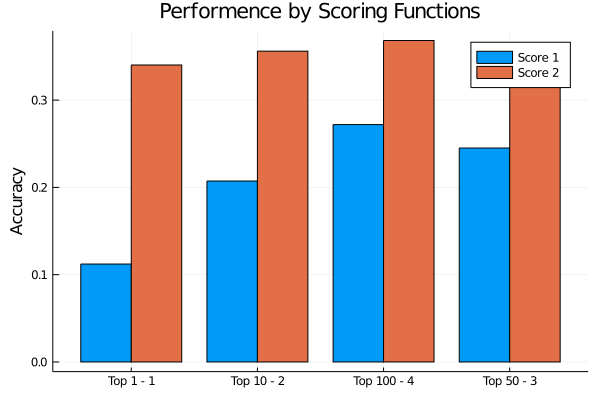

In [210]:
groupedbar(nam, mn, ylabel = "Accuracy", 
        title = "Performence by Scoring Functions", group=sx)